
## Cork Institute of Technology

### MSc in Data Science and Analytics

## Applied Machine Learning 
## Project 3 Assignment

#### Givaldo Francisco S Jr


In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0']


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


### Import libraries

In [3]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



Using TensorFlow backend.


### Define image properties

In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# load images from train foder

### Prepare dataset for training model

In [5]:
filenames = os.listdir("train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
df.head()

filename  category
0    cat.0.jpg         0
1    cat.1.jpg         0
2   cat.10.jpg         0
3  cat.100.jpg         0
4  cat.101.jpg         0

In [7]:
df.tail()

filename  category
997   dog.95.jpg         1
998   dog.96.jpg         1
999   dog.97.jpg         1
1000  dog.98.jpg         1
1001  dog.99.jpg         1

### total image of cat and dog

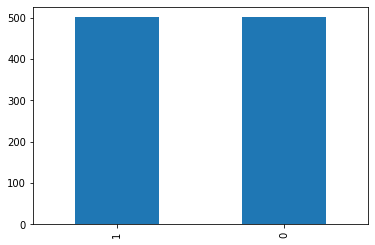

In [8]:
df['category'].value_counts().plot.bar()

### Selecting one sample image

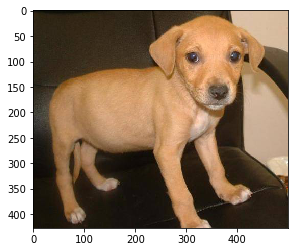

In [9]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

## Creating the neural net model

the image needs to be converted into a vector of numbers

Instead of feeding the entire image as an array of numbers, the image is broken up into a number of tiles, the machine then tries to predict what each tile is. Finally, the computer tries to predict what’s in the picture based on the prediction of all the tiles. This allows the computer to parallelize the operations and detect the object regardless of where it is located in the image.

### BatchNormalization

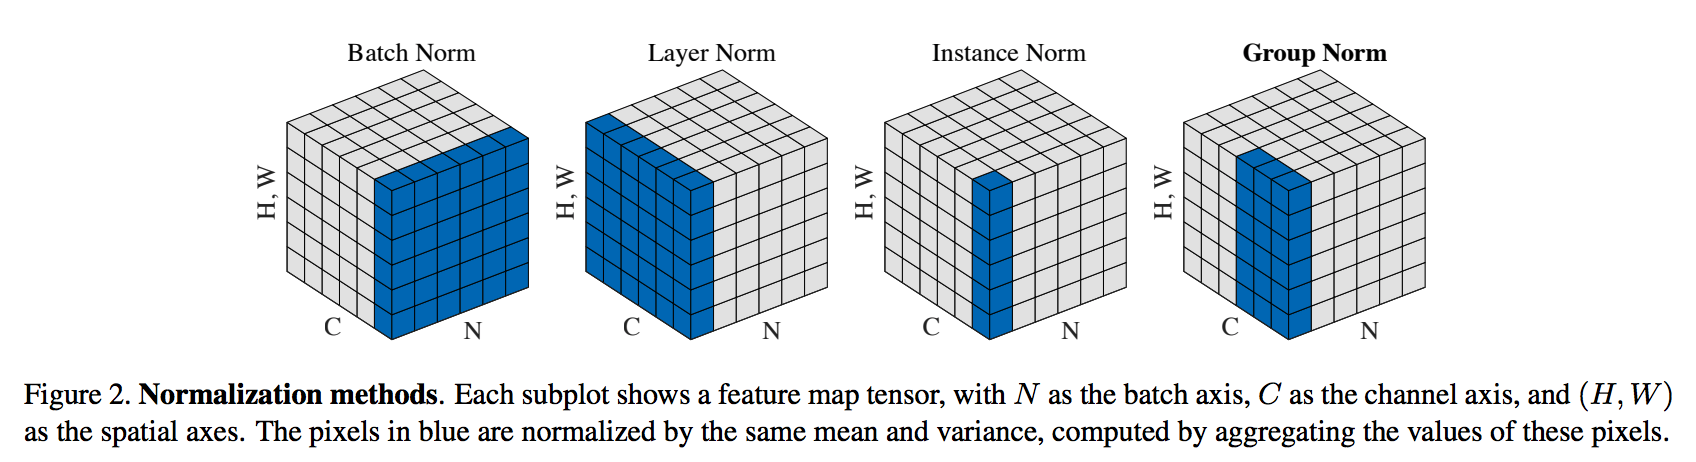

Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network. 

It is a layer that putted in between convolution and activation layers or sometimes after activation layers, it is used to normalize layer’s input to reduce the internal covariate shift problem.

This problem occurs by changing in distribution of the input data in the early layers, and because Every layer depends on the input of the former layers then it becomes a problem for this layer since it requires repeatedly adjusting to new input distributions.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per mini-batch and using these statistics to perform the standardization.

### Maxpooling

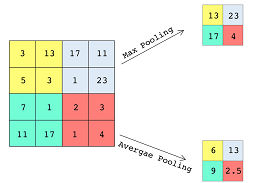

### dropout

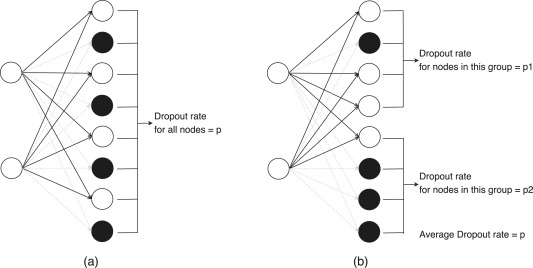

### ReLU

Dying ReLU
The downside for being zero for all negative values is a problem called “dying ReLU.”
A ReLU neuron is “dead” if it’s stuck in the negative side and always outputs 0. Because the slope of ReLU in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing.

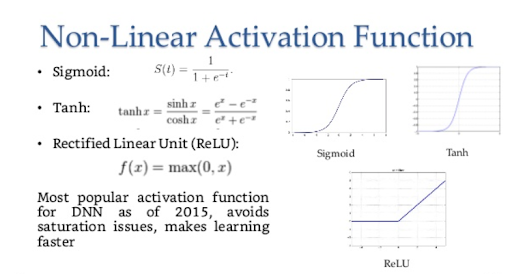

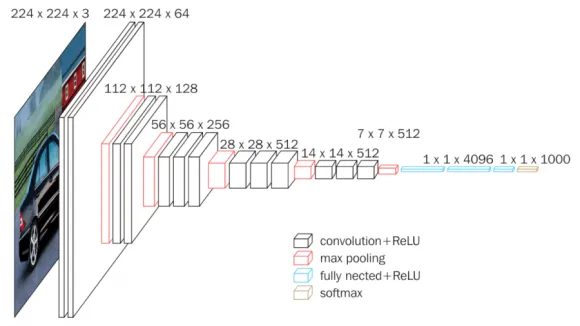

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

## Define callbacks and learning rate

A custom callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference, including reading/changing the Keras model. Examples include tf.keras.callbacks.TensorBoard where the training progress and results can be exported and visualized with TensorBoard, or tf.keras.callbacks.ModelCheckpoint where the model is automatically saved during training, and more. In this guide, you will learn what Keras callback is, when it will be called, what it can do, and how you can build your own. Towards the end of this guide, there will be demos of creating a couple of simple callback applications to get you started on your custom callback.

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
earlystop = EarlyStopping(patience=10)

In machine learning, early stop is a form of regularization used to avoid excessive adjustments when training a student with an iterative method, such as gradient descent. These methods update the student to better match the training data with each iteration.

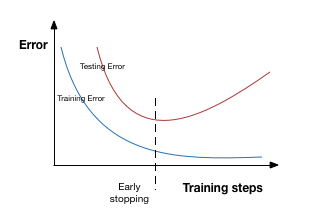

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

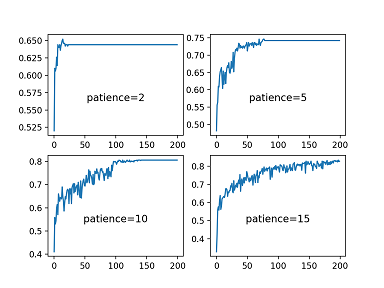

In [14]:
callbacks = [earlystop, learning_rate_reduction]

In [95]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

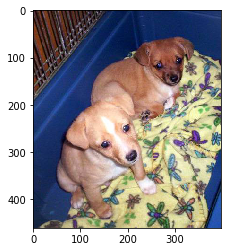

In [98]:
sample = random.choice(df['filename'])
image = load_img("train/"+sample)
plt.imshow(image)

In [16]:
train_df, validate_df = train_test_split(df, test_size=0.30, random_state=25)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [134]:
validate_df

filename category
0       cat.493.jpg      cat
1      dog.5213.jpg      dog
2       cat.745.jpg      cat
3     dog.11024.jpg      dog
4     dog.11365.jpg      dog
5      cat.5488.jpg      cat
6      cat.3972.jpg      cat
7     dog.11988.jpg      dog
8      cat.1796.jpg      cat
9      cat.7359.jpg      cat
10     dog.6780.jpg      dog
11     cat.1900.jpg      cat
12      cat.474.jpg      cat
13     dog.1050.jpg      dog
14    cat.12263.jpg      cat
15    dog.10774.jpg      dog
16     dog.9572.jpg      dog
17     dog.6471.jpg      dog
18     cat.4591.jpg      cat
19     cat.4950.jpg      cat
20     cat.5725.jpg      cat
21     cat.6500.jpg      cat
22     cat.4732.jpg      cat
23    cat.12000.jpg      cat
24     cat.9602.jpg      cat
25     dog.9094.jpg      dog
26     cat.7408.jpg      cat
27     dog.2553.jpg      dog
28     dog.2762.jpg      dog
29    cat.10378.jpg      cat
...             ...      ...
4971   dog.1030.jpg      dog
4972   dog.9025.jpg      dog
4973   cat.4945.jpg      cat
4974   dog.5789.jpg      dog
4975  dog.10161.jpg      dog
4976   dog.3346.jpg      dog
4977    cat.237.jpg      cat
4978   cat.5454.jpg      cat
4979  dog.10178.jpg      dog
4980   dog.1579.jpg      dog
4981   cat.4556.jpg      cat
4982   cat.7320.jpg      cat
4983   dog.5053.jpg      dog
4984  cat.11570.jpg      cat
4985  cat.10522.jpg      cat
4986   cat.8032.jpg      cat
4987   cat.9346.jpg      cat
4988   cat.7609.jpg      cat
4989  cat.12377.jpg      cat
4990  cat.12080.jpg      cat
4991  dog.11682.jpg      dog
4992   dog.4049.jpg      dog
4993   cat.9474.jpg      cat
4994   cat.6971.jpg      cat
4995   cat.6551.jpg      cat
4996   cat.9403.jpg      cat
4997    cat.236.jpg      cat
4998   dog.2116.jpg      dog
4999  cat.10622.jpg      cat
5000  dog.10340.jpg      dog

[5001 rows x 2 columns]

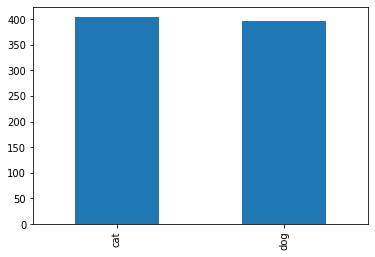

In [17]:
train_df['category'].value_counts().plot.bar()

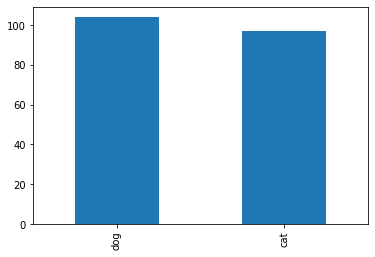

In [18]:
validate_df['category'].value_counts().plot.bar()

# training

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=10

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 801 validated image filenames belonging to 2 classes.


### ImageDataGenerator

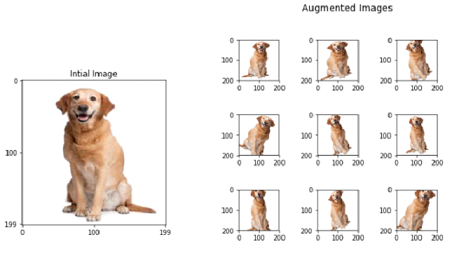

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. 

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 201 validated image filenames belonging to 2 classes.


In [22]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


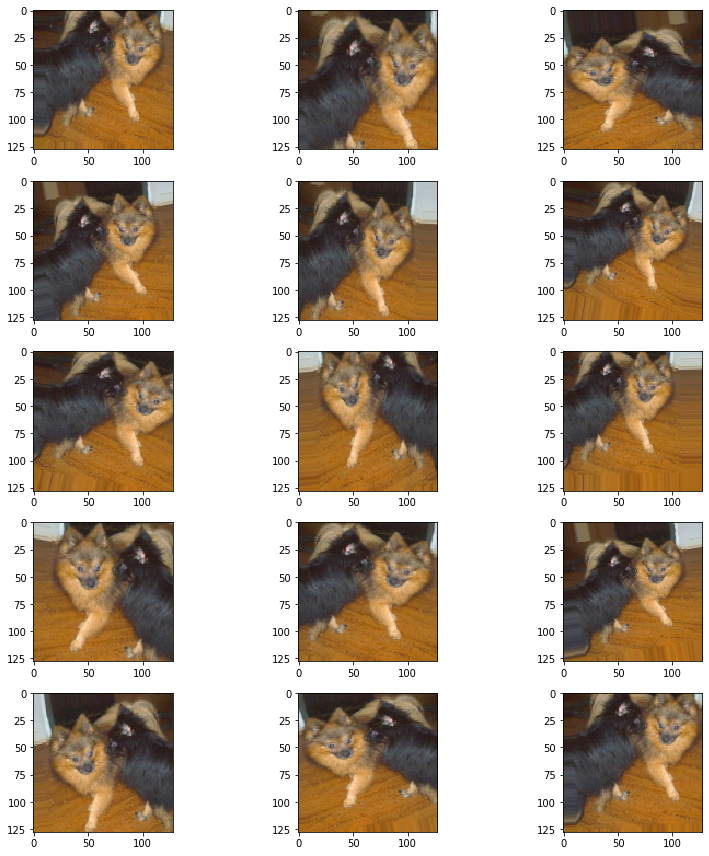

In [23]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### fit_generator() function

fit_generator() function. our . fit_generator() function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model. For the number of epochs specified(10 in our case) the process is repeated

When we call the .fit_generator() function it makes assumptions:

Keras is first calling the generator function(dataAugmentaion)
Generator function(dataAugmentaion) provides a batch_size of 32 to our .fit_generator() function.
our .fit_generator() function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.
For the number of epochs specified(10 in our case) the process is repeated.

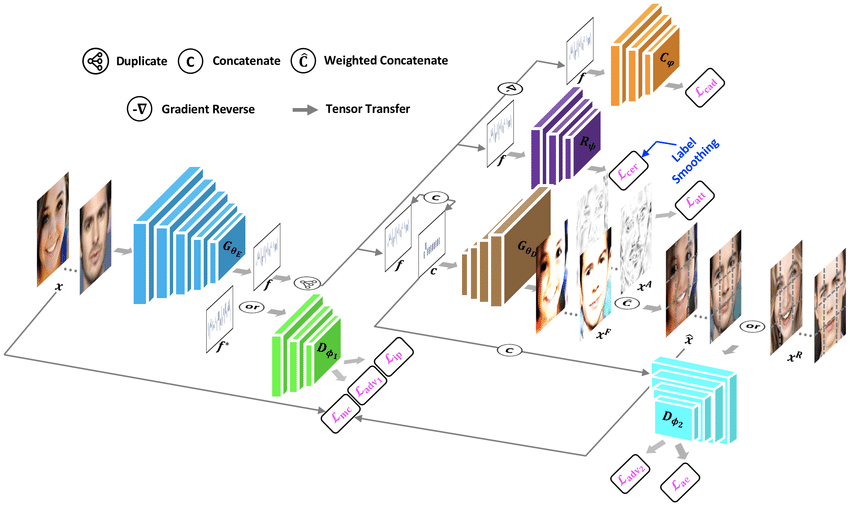

In [24]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
53/53 [==============================] - 40s 749ms/step - loss: 1.4978 - accuracy: 0.5496 - val_loss: 3.3864 - val_accuracy: 0.4821
Epoch 2/50


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


53/53 [==============================] - 40s 751ms/step - loss: 1.0947 - accuracy: 0.6005 - val_loss: 4.9092 - val_accuracy: 0.4892
Epoch 3/50
53/53 [==============================] - 41s 771ms/step - loss: 1.0394 - accuracy: 0.5585 - val_loss: 0.5043 - val_accuracy: 0.5269
Epoch 4/50
53/53 [==============================] - 40s 763ms/step - loss: 0.8675 - accuracy: 0.6094 - val_loss: 5.0715 - val_accuracy: 0.4785
Epoch 5/50
53/53 [==============================] - 41s 765ms/step - loss: 0.8564 - accuracy: 0.5992 - val_loss: 1.9019 - val_accuracy: 0.4785
Epoch 6/50
53/53 [==============================] - 41s 773ms/step - loss: 0.7728 - accuracy: 0.6247 - val_loss: 1.7732 - val_accuracy: 0.4892
Epoch 7/50
53/53 [==============================] - 41s 777ms/step - loss: 0.7098 - accuracy: 0.6705 - val_loss: 1.0738 - val_accuracy: 0.4785
Epoch 8/50
53/53 [==============================] - 41s 768ms/step - loss: 0.6883 - accuracy: 0.6450 - val_loss: 0.7449 - val_accuracy: 0.5430
Epoch 9/50

In [105]:
history.epoch

[0, 1, 2, 3, 4]

In [101]:
model.save_weights("model.h5")

### Ploting Training loss, Validation loss, Training accuracy and Validation accuracy

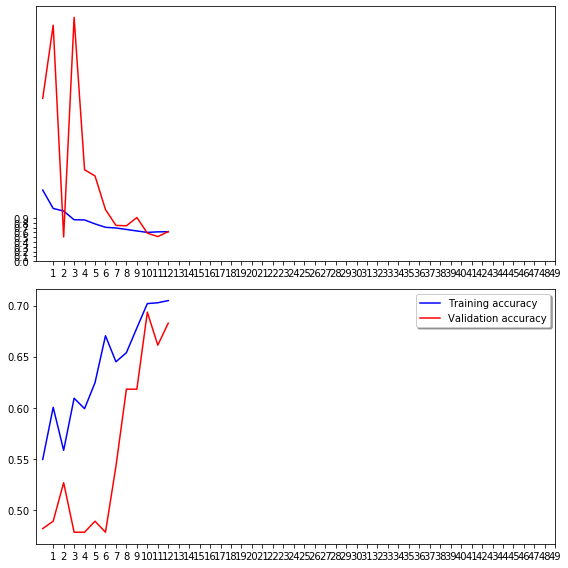

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### load files from test1 folder

In [27]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [28]:
### using flow_from_dataframe function 

In [29]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 100 validated image filenames.


### predict_generator

In [30]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [31]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [32]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [33]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

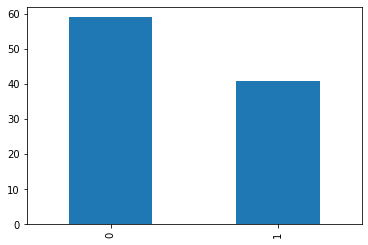

In [34]:
test_df['category'].value_counts().plot.bar()

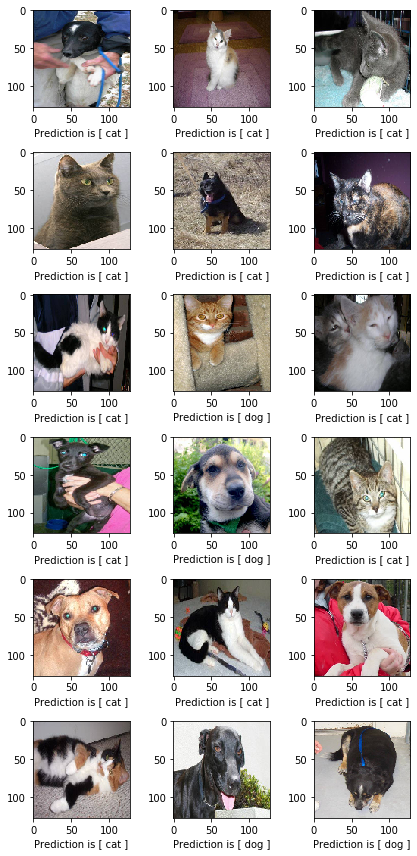

In [35]:

sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(6, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    if(category==0):
        out='cat'
    else:
        out='dog'
    #plt.xlabel(filename + '(' + "{}".format(category) + ')' )
    plt.xlabel("Prediction is [ "+out+" ]")
plt.tight_layout()
plt.show()

# Submission

In [36]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

# -------------------------------------------------------------------------------------------------------------

# Changing the hyperparameters

# Using 25000 train images

In [125]:
filenames = os.listdir("train2")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

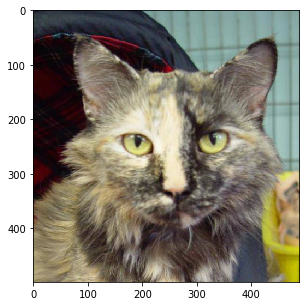

In [127]:
plt.figure(figsize=(5, 5))
image = load_img("train2/"+df['filename'][2])
plt.imshow(image)

In [38]:
df.shape

(25001, 2)

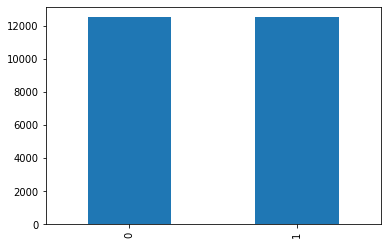

In [39]:
df['category'].value_counts().plot.bar()

In [40]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [41]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

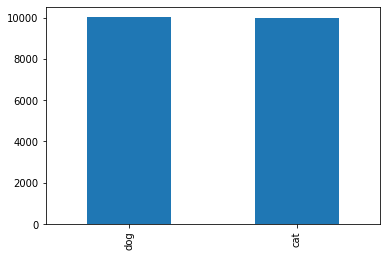

In [42]:
train_df['category'].value_counts().plot.bar()

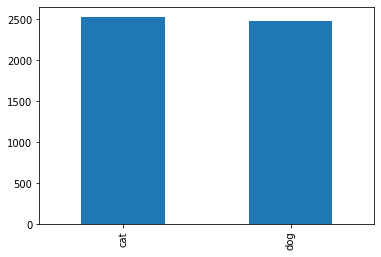

In [43]:
validate_df['category'].value_counts().plot.bar()

In [44]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [45]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train2/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 19999 validated image filenames belonging to 2 classes.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [108]:
train_generator.color_mode

'rgb'

In [109]:
train_generator.batch_size

15

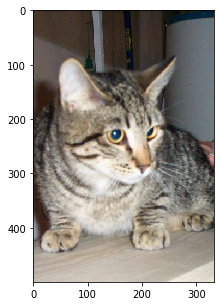

In [132]:
plt.figure(figsize=(5, 5))
image = load_img("train2/"+train_generator.filenames[5])
plt.imshow(image)

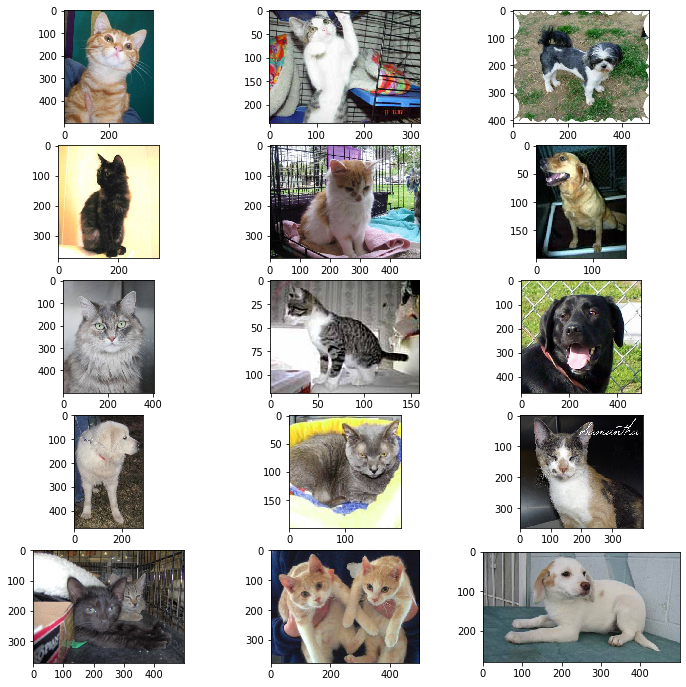

In [129]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)   
    sample = random.choice(train_generator.filenames)
    image = load_img("train2/"+sample)
    plt.imshow(image)

In [114]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train2/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5001 validated image filenames belonging to 2 classes.


In [47]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train2/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


### Above we can see all images with the same size and rotated

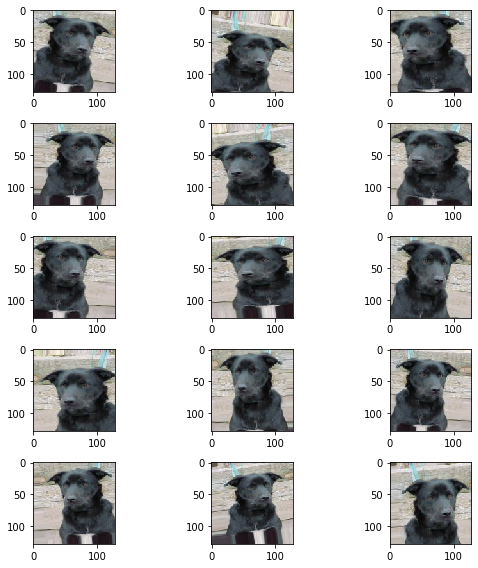

In [48]:
plt.figure(figsize=(8, 8))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [49]:
epochs=3 if FAST_RUN else 5
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/5
1333/1333 [==============================] - 1042s 782ms/step - loss: 0.5977 - accuracy: 0.6902 - val_loss: 0.6244 - val_accuracy: 0.7149
Epoch 2/5
1333/1333 [==============================] - 1044s 783ms/step - loss: 0.5309 - accuracy: 0.7392 - val_loss: 0.6870 - val_accuracy: 0.7790
Epoch 3/5
1333/1333 [==============================] - 1077s 808ms/step - loss: 0.4891 - accuracy: 0.7683 - val_loss: 0.2741 - val_accuracy: 0.8149
Epoch 4/5
1333/1333 [==============================] - 1153s 865ms/step - loss: 0.4558 - accuracy: 0.7870 - val_loss: 1.0781 - val_accuracy: 0.7008
Epoch 5/5
1333/1333 [==============================] - 1197s 898ms/step - loss: 0.4417 - accuracy: 0.8008 - val_loss: 0.4331 - val_accuracy: 0.7872


In [50]:
model.save_weights("model.h5")

In [51]:
history.history

{'val_loss': [0.6243996024131775,
  0.6869701743125916,
  0.2740839719772339,
  1.0781023502349854,
  0.4331289827823639],
 'val_accuracy': [0.7149149179458618,
  0.7789811491966248,
  0.8148816823959351,
  0.700762152671814,
  0.7872041463851929],
 'loss': [0.5975987233834459,
  0.5310108994668404,
  0.48903540770685056,
  0.4557597495710926,
  0.4415699318338415],
 'accuracy': [0.6901521, 0.7392414, 0.76831466, 0.7870296, 0.8008407],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001]}

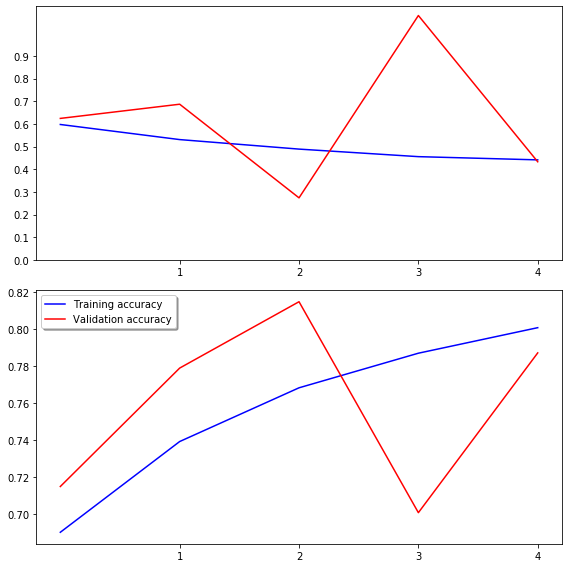

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [53]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [54]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 100 validated image filenames.


In [55]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [56]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [57]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [58]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

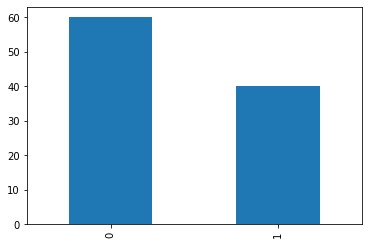

In [59]:
test_df['category'].value_counts().plot.bar()

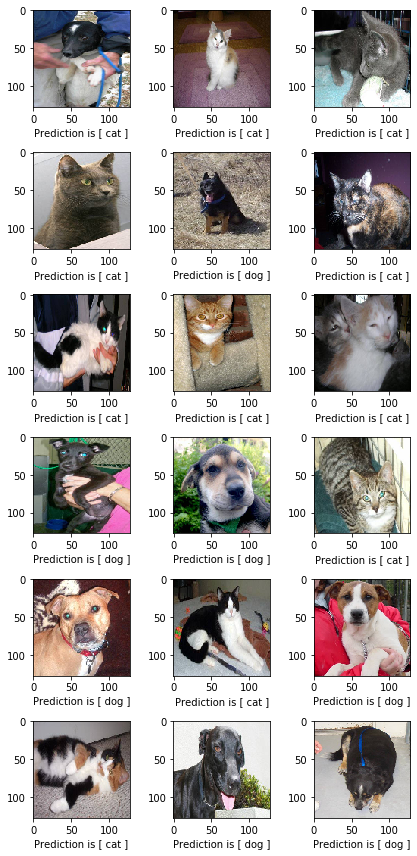

In [60]:

sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(6, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    if(category==0):
        out='cat'
    else:
        out='dog'
    #plt.xlabel(filename + '(' + "{}".format(category) + ')' )
    plt.xlabel("Prediction is [ "+out+" ]")
plt.tight_layout()
plt.show()

In [61]:

from os import listdir
from os.path import join, basename
from PIL import Image

print(listdir("."))
IMG_HEIGHT = 50
IMG_WIDTH = 50
NUM_CHANNELS = 3

from threading import current_thread, Thread, Lock
from multiprocessing import Queue
# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'cats vs dogs classification with CNN keras.ipynb', 'CatsvsDogs.ipynb', 'classification cat and dogs.ipynb', 'Dogs vs. Cats Classification (VGG16 Fine Tuning).ipynb', 'Full Classification Example with ConvNet.ipynb', 'Givaldo-v2.ipynb', 'Givaldo_R00182595.ipynb', 'Keras CNN Dog or Cat Classification.ipynb', 'model.h5', 'sampleSubmission.csv', 'submission.csv', 'Test Time Augmentation (TTA) ... worth it_.ipynb', 'test1', 'test1.zip', 'test_arr.pickle', 'train', 'train2', 'train2.zip', 'train_arr.pickle', 'train_data.npy', 'train_labels.pickle']


In [62]:
# use of queue for collecting results from threads
def initialize_queue():
    queue = Queue()
    return queue

In [63]:
train_dir_path = "train"
test_dir_path = "test1"

train_imgs = [join(train_dir_path,f) for f in listdir(train_dir_path)]
test_imgs = [join(test_dir_path,f) for f in listdir(test_dir_path)]
print(len(train_imgs))
print(len(test_imgs))

1002
100


In [64]:
# initializations related to threading stuff
batch_size = 4
num_train_images = len(train_imgs)
num_test_images = len(test_imgs)
num_train_threads = int(num_train_images/4)  # 50
num_test_threads = int(num_test_images/4)    # 25
lock = Lock()

In [65]:
# one hot encode labels based on name of image file
def get_img_label(fpath):
    category = fpath.split(".")[-3]
    if category == "dog":
        return [1,0]
    elif category == "cat":
        return [0,1]

In [66]:
def get_img_array_labels(fpaths, queue):
    img_array = None
    labels = []
    for f in fpaths:
        arr = Image.open(f)
        arr = arr.resize((IMG_HEIGHT,IMG_WIDTH), Image.ANTIALIAS)
        arr = np.reshape(arr, (-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS))
        if img_array is None:
            img_array = arr
        else:
            img_array = np.vstack((img_array, arr))
        labels.append(get_img_label(basename(f)))
    labels = np.array(labels)
    queue.put((img_array, labels))

In [67]:
# convert testing images to numpy array
def get_img_array(fpaths, queue):
    img_array = None
    for f in fpaths:
        arr = Image.open(f)
        arr = arr.resize((IMG_HEIGHT,IMG_WIDTH), Image.ANTIALIAS)
        arr = np.reshape(arr, (-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS))
        if img_array is None:
            img_array = arr
        else:
            img_array = np.vstack((img_array, arr))        
    queue.put(img_array)

In [68]:
def dump_array(fname,arr):
    with open(fname,'wb') as f:
        pickle.dump(arr,f)

In [69]:
def load_pickled_array(fname,arr):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [70]:
# using threading combine training array and labels for training data
def get_training_data():
    threads_list = list()
    train_x = None
    train_y = []
    queue = initialize_queue()
    # iterate over num of threads to create
    for thread_index in range(num_train_threads):
        start_index = thread_index * batch_size
        end_index = (thread_index + 1) * batch_size
        file_batch = train_imgs[start_index:end_index]
        thread = Thread(target =get_img_array_labels, args=(file_batch, queue))
        thread.start()
        #print("Thread: {}, start index: {}, end index: {}".format(thread.name, start_index, end_index))
        threads_list.append(thread)
    
    # join threads
    for t in threads_list:
        t.join()
    while not queue.empty():
        arr, labels = queue.get()
        train_y.extend(labels)
        if train_x is None:
            train_x = arr
        else:
            train_x = np.vstack((train_x, arr))
    return train_x, train_y

In [71]:
# using multithreading combine testing array for testing data
def get_testing_data():
    threads_list = list()
    test_x = None
    queue = initialize_queue()
    # iterate over num of threads to create
    for thread_index in range(num_test_threads):
        start_index = thread_index * batch_size
        end_index = (thread_index + 1) * batch_size
        file_batch = train_imgs[start_index:end_index]
        thread = Thread(target =get_img_array, args=(file_batch, queue))
        thread.start()
        #print("Thread: {}, start index: {}, end index: {}".format(thread.name, start_index, end_index))
        threads_list.append(thread)
    
    # join threads
    for t in threads_list:
        t.join()
        print( t.name)
        
    while not queue.empty():
        arr= queue.get()
        if test_x is None:
            test_x = arr
        else:
            test_x = np.vstack((test_x, arr))
            
    return test_x

In [72]:
# convert training images to train_x and train_y
train_x, train_y = get_training_data()

In [73]:
print(train_x.shape)
print(len(train_y))
test_x = get_testing_data()


(1000, 50, 50, 3)
1000
Thread-423
Thread-424
Thread-425
Thread-426
Thread-427
Thread-428
Thread-429
Thread-430
Thread-431
Thread-432
Thread-433
Thread-434
Thread-435
Thread-436
Thread-437
Thread-438
Thread-439
Thread-440
Thread-441
Thread-442
Thread-443
Thread-444
Thread-445
Thread-446
Thread-447


In [74]:
test_x.shape

(100, 50, 50, 3)

In [76]:
# dump training data
import pickle
dump_array('train_arr.pickle',train_x)
dump_array('train_labels.pickle',train_y)

In [77]:
# dump testing data
dump_array('test_arr.pickle',test_x)

In [78]:

# convert train_y to np. array
train_y = np.array(train_y)
print("train_y.shape", train_y.shape)

train_y.shape (1000, 2)


In [79]:
# mean normalize train and test images
train_x = train_x/255
test_x = test_x/255

In [81]:
# CNN model
# CNN model
model = Sequential()

# -----------------------------------------------------------------------------------
# conv 1
model.add(Conv2D(16, (3,3), input_shape=(50,50,3))) # 148,148,32
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 1
model.add(MaxPooling2D(pool_size=(2,2),strides=2))          # 72,72,32

# -----------------------------------------------------------------------------------
# conv 2
model.add(Conv2D(16, (3,3)))                      # 68,68,32
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 2
model.add(MaxPooling2D(pool_size=(2,2),strides=2))          # 34,34,32
# -----------------------------------------------------------------------------------

# conv 3
model.add(Conv2D(32, (3,3)))                      # 32,32,32
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.7))

# max pool 3
model.add(MaxPooling2D(pool_size=(2,2),strides=2))          # 17,17,32
# -----------------------------------------------------------------------------------

# conv 4
model.add(Conv2D(32, (3,3)))                      # 15,15,32
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.7))
# max pool 4
model.add(MaxPooling2D(pool_size=(2,2),strides=2))  # 7,7,32

# flatten
model.add(Flatten())


# fc layer 1
model.add(Dense(512, activation='relu'))

#model.add(Dropout(0.7))

#model.add(Dense(256, activation='relu'))

#model.add(Dropout(0.5))

# fc layer 2
model.add(Dense(2, activation='softmax'))


In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [83]:
#model.(valdn_x, valdn_y, batch_size=32, verbose=1)
predictions = model.predict(test_x, batch_size=32, verbose=3)

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 16)       

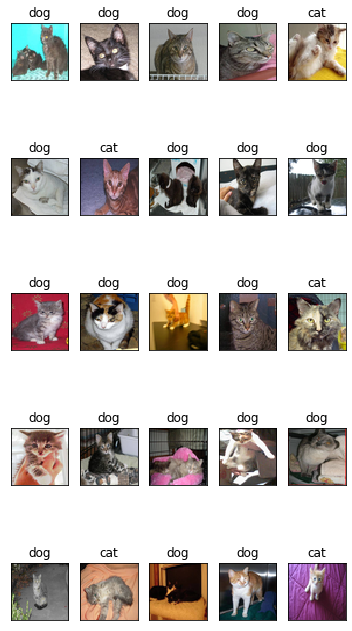

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(6, 12))


for index in range(25):
    # cat: [1,0]
    # dog: [0,1]
    y = fig.add_subplot(5,5,index+1)
    #model_out = model.predict([data])
    img = test_x[index]
    model_out = predictions[index]
    
    if np.argmax(model_out) == 0: str_label='dog'
    else: str_label='cat'
        
    y.imshow(img)
    plt.title(str_label)
  
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [86]:
with open('submission.csv','w') as f:
    f.write('id,label\n')
    for index in range(len(test_imgs)):
        img_id =basename(test_imgs[index]).split(".")[0]
        prob = (predictions[index,0])
        #print("index: {}, img_id: {}, prob:{}".format(index,img_id, prob))
        f.write("{},{}\n".format(img_id, prob))